**Group B** \
Students: Elodie-Angélique Lendi, Mridhula Jayasankar, Clarice Jasmine Mihalache



In [ ]:
# Import needed modules 
# numpy will be used to convert lists to arrays and to use log, exp and fitting functions
import numpy as np 
# matplotlib will be used for plotting
import matplotlib.pyplot as plt


#### After the researcher did the fitting, she obtained the following values:
    qsat = 4.72 mmol/g
    k(263) = 6.75e-06 1/Pa
    k(303) = 1.48e-06 1/Pa
    k(343) = 5.16e-07 1/Pa

#### Use the Van't Hoff equation to obtain k0 and delta H

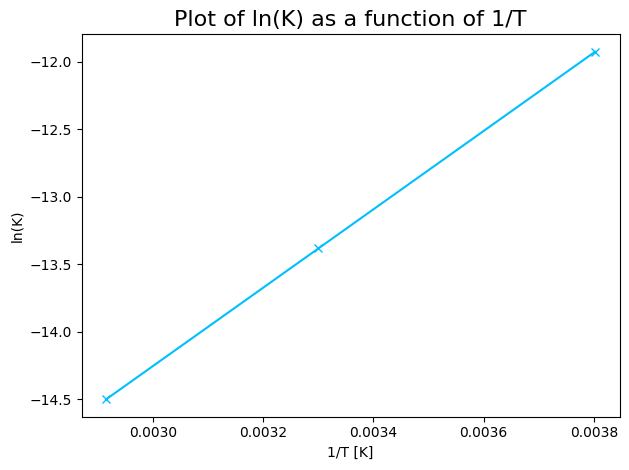

For this set of data, delta H is -24157.198419972283 [J/mol] and k0 is 1.0562039350936559e-10 [1/Pa]


In [27]:
from scipy.constants import R

# Group the temperatures and K values in arrays

T_K_values_array = np.array([[263, 6.75e-06], 
                             [303, 1.48e-06], 
                             [343, 5.16e-07]])

# We know that we need to plot lnk vs. 1/T. 
# Indeed, when we rearrange the terms in Van't Hoff's equation, we see that we can access k0 and delta H. 
# The slope is given by -deltaH/R and the intercept corresponds to ln(k0). 
# By plotting the graphs and accessing these two parameters, we can therefore find delta H and k0.

# Plot of lnk vs. 1/T

# First we have to exctract data from the array
T = T_K_values_array[:, 0]
K = T_K_values_array[:,1]

# Fitting a linear regression line to the curve (y = mx +b)
m, b = np.polyfit(1/T, np.log(K), 1)

# Plot
#plt.plot(1/T, np.ln(K), marker = "x", color = 'deepskyblue')

plt.plot(1/T, m*(1/T)+b, marker = "x", color = 'deepskyblue')
plt.xlabel("1/T [K]")
plt.ylabel("ln(K)")
plt.title(f"Plot of ln(K) as a function of 1/T", size = 16)
plt.tight_layout()
plt.show()

# Solve for the unknowns by linear fitting

k0 = np.exp(b)
delta_H = -m*R

# Print the results

print(f"For this set of data, delta H is {delta_H} [J/mol] and k0 is {k0} [1/Pa]")

#### Calculate Henry's coefficients for the different temperatures

T = 263 K → K(T) = 6.75e-06, Kh = 3.186e-05 mmol/(g·Pa)
T = 303 K → K(T) = 1.48e-06, Kh = 6.986e-06 mmol/(g·Pa)
T = 343 K → K(T) = 5.16e-07, Kh = 2.436e-06 mmol/(g·Pa)
[3.1859999999999997e-05, 6.9856e-06, 2.43552e-06]


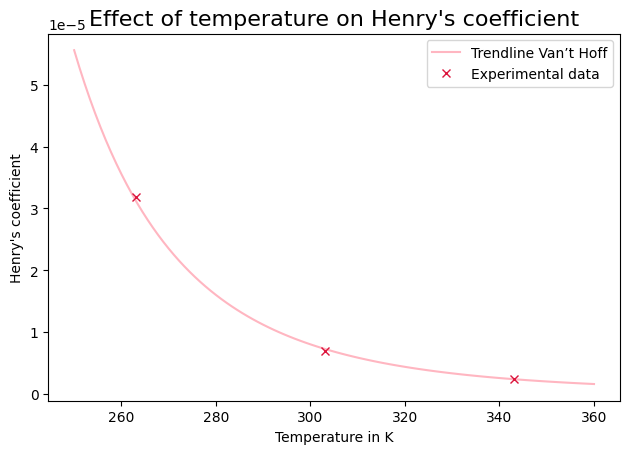

In [26]:
# Calculating the Henry's coefficients
# From previous question, we have a general expression for the Henry's coefficient (Kh) -> Kh = q_sat*K(T)

# Given q_sat  in mmol/g
q_sat = 4.72 #mmol/g

# K(T) at 263 K, 303 K, 343 K in 1/Pa

K_T = [6.75e-6, 1.48e-6, 5.16e-7]

# Associated temperature

T = [263, 303, 343]

# We can calculate Henry's coefficient for each T and stock them in a list
# In the same step, we can print the results

Kh_list = []

for i in range(len(K_T)):
    Kh = q_sat*K_T[i]
    Kh_list.append(Kh)
    print(f"T = {T[i]} K → K(T) = {K_T[i]:.2e}, Kh = {Kh:.3e} mmol/(g·Pa)")

# Continuous curve using the following formula Kh = q_sat*k0*exp((-delta_H)/(RT)) for a temperature range from 250 K to 360 K (100 points)
T_fit = np.linspace(250, 360, 100) 
Kh_fit = q_sat * k0 * np.exp(-delta_H / (R * T_fit))

print(Kh_list)

plt.plot(T_fit, Kh_fit, '-', color='lightpink', label='Trendline Van’t Hoff')
plt.plot(T, Kh_list, marker = "x", linestyle = "", color = "crimson", label = "Experimental data")
plt.xlabel("Temperature in K")
plt.ylabel("Henry's coefficient")
plt.title("Effect of temperature on Henry's coefficient", size = 16)
plt.legend()
plt.tight_layout()
plt.show()

# Remember the formula for Kh (mmol/(g.Pa))

# we have the following fornula : Kh = q_sat*K(T) = q_sat*k0*exp((-delta_H)/(RT)) (using Van't Hoff equation)


## Comments on Henry's coefficient values as a function of temperature
Firstly, we see that the experimental values of $K_H$ given in the instructions follow the trend described by Van't Hoff's law.

$$
K_{\mathrm{H}}(T) = q_{sat}\cdot\ K_0 \cdot \exp\left(-\frac{\Delta H_{\mathrm{ads}}}{R T} \right)
$$

Secondly, we observe an exponential decrease in the value of $K_H$. Recall that $K_H$ describes the solubility of a gas in a liquid or solid at low pressure. The fact that the value of $K_H$ decreases with temperature is visible graphically and comes directly from the above expression. From a physical point of view, this is because the adsorption process is often exothermic (1). Furthermore, we can hypothesise that as the temperature increases, the particles will move more quickly and therefore be less easily adsorbed by the surface.

Finally, we see that Henry's coefficient tends towards zero as the temperature tends towards infinity, indicating that when the temperature is very high, the solubility of the gas (adsorbate, in this case $CO_2$) will be almost zero on the surface (adsorbent). 

### References
(1) https://pubs.acs.org/doi/10.1021/acs.langmuir.1c01576?utm_, last consulted on $21^{st}$ September $2025$